### Scripts to process SST indices in text like formats directly downloaded from centre websites 

In [1]:
# Process DMI, Nino3, and Nino3.4 downloaded from the NOAA PSL webpage (https://psl.noaa.gov/gcos_wgsp/Timeseries/Nino4/)

sst_dir = '/g/data/w97/ad9701/p_prob_analysis/sst_data/'
infile = ['dmi.had.long.data.txt', 'nino4.long.anom.data.txt', 'nino34.long.anom.data.txt']
outfile = ['dmi.had.long.data.nc', 'nino4.long.anom.data.nc', 'nino34.long.anom.data.nc']
indName = ['dmi', 'nino4_anom', 'nino34_anom']
longName = ['dipole_mode_index_noaa', 'nino4_anom_noaa', 'nino34_anom_noaa']
               
from datetime import datetime
import xarray as xr
import pandas as pd
import numpy as np

nYears = len(np.arange(1870, 2020,1))+1  # start and end years

for j in np.arange(len(infile)):

    with open(sst_dir+infile[j], 'r') as f:
        for i in range(1):
            f.readline()
        fLines = f.readlines()

    year = []
    result = []
    for li in fLines[0:nYears]:
        tt = li.split('   ')
        year.append(float(tt[0]))
        result.extend([float(i) for i in tt[1:]])

    time_array = pd.date_range("1870-01-01", periods=nYears*12, freq="MS")

    # define data with variable attributes
    data_vars = {indName[j]:(['time'], result, 
                             {'units': ' ', 
                              'long_name':longName[j]})}

    # define coordinates
    coords = {'time': (['time'], time_array)}

    # define global attributes
    attrs = {'author':'Anjana Devanand',
             'source': ''.join(fLines[nYears+2:])}

    # create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                    coords=coords, 
                    attrs=attrs)

    ds.to_netcdf(sst_dir+outfile[j])

In [16]:
sst_dir = '/g/data/w97/ad9701/p_prob_analysis/sst_data/'
infile = 'newsam.1957.2021.txt'
outfile = 'newsam.1957.2021.nc'
indName = 'sami'
longName = 'sami_bac_ac_uk'
               
from datetime import datetime
import xarray as xr
import pandas as pd
import numpy as np

nYears = len(np.arange(1957, 2020,1))+1  # start and end years

with open(sst_dir+infile, 'r') as f:
    for i in range(2):
        f.readline()
    fLines = f.readlines()
fLines

year = []
result = []
for li in fLines[0:nYears]:
    tt = li.split()
    year.append(float(tt[0]))
    result.extend([float(i) for i in tt[1:]])

time_array = pd.date_range("1957-01-01", periods=nYears*12, freq="MS")

# define data with variable attributes
data_vars = {indName:(['time'], result, 
                         {'units': ' ', 
                          'long_name':longName})}

# define coordinates
coords = {'time': (['time'], time_array)}

# define global attributes
attrs = {'author':'Anjana Devanand',
        'source': 'http://www.nerc-bas.ac.uk/icd/gjma/sam.html'}

# create dataset
ds = xr.Dataset(data_vars=data_vars, 
                    coords=coords, 
                    attrs=attrs)

ds.to_netcdf(sst_dir+outfile)

In [17]:
# SOI downloaded from the BoM website

sst_dir = '/g/data/w97/ad9701/p_prob_analysis/sst_data/'
infile = 'soi_monthly.txt'
outfile = 'soi_monthly.nc'
indName = 'soi'
longName = 'boi_BoM'
               
from datetime import datetime
import xarray as xr
import pandas as pd
import numpy as np

nYears = len(np.arange(1876, 2020,1))+1  # start and end years

with open(sst_dir+infile, 'r') as f:
#     for i in range(2):
#         f.readline()
    fLines = f.readlines()
fLines

year = []
result = []
for li in fLines[0:nYears*12]:
    tt = li.split(',')
    year.append(float(tt[0]))
    result.append(float(tt[1]))
    #result.extend([float(i) for i in tt[1:]])

time_array = pd.date_range("1876-01-01", periods=nYears*12, freq="MS")

# define data with variable attributes
data_vars = {indName:(['time'], result, 
                         {'units': ' ', 
                          'long_name':longName})}

# define coordinates
coords = {'time': (['time'], time_array)}

# define global attributes
attrs = {'author':'Anjana Devanand',
        'source': 'http://www.nerc-bas.ac.uk/icd/gjma/sam.html'}

# create dataset
ds = xr.Dataset(data_vars=data_vars, 
                    coords=coords, 
                    attrs=attrs)

ds.to_netcdf(sst_dir+outfile)


<xarray.DataArray 'soi' ()>
array(0.06431034)
<xarray.DataArray 'soi' ()>
array(10.43514105)


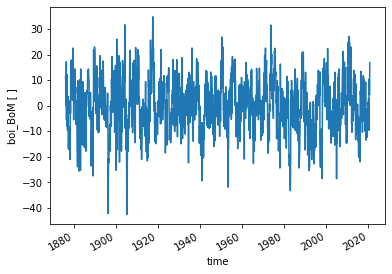

In [16]:
ds['soi'].plot()
print(ds['soi'].mean())
print(ds['soi'].std())

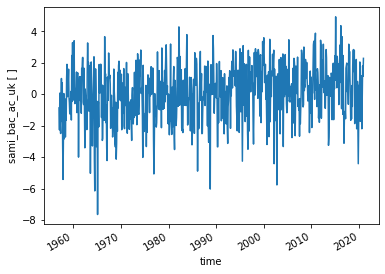

In [18]:
ds['sami'].plot()

In [19]:
print(ds['sami'].mean())
print(ds['sami'].std())

<xarray.DataArray 'sami' ()>
array(0.0431901)
<xarray.DataArray 'sami' ()>
array(1.78762117)


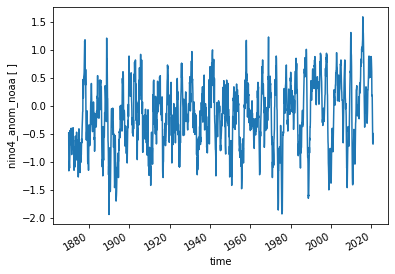

In [25]:
ds['nino4_anom'].plot()

In [26]:
print(ds['nino4'].mean())
print(ds['nino4'].std())

<xarray.DataArray 'nino4' ()>
array(-0.17239514)
<xarray.DataArray 'nino4' ()>
array(0.58006746)


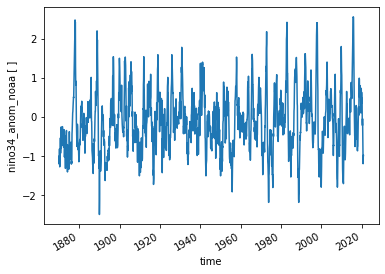

In [29]:
ds['nino34_anom'].plot()

In [30]:
print(ds['nino34_anom'].mean())
print(ds['nino34_anom'].std())

<xarray.DataArray 'nino34_anom' ()>
array(-0.09951435)
<xarray.DataArray 'nino34_anom' ()>
array(0.77021598)


In [ ]:
# Nino3 and Nino3.4 data

sst_dir = '/g/data/w97/ad9701/p_prob_analysis/sst_data/'
infile = ['dmi.had.long.data.txt'
outfile = 'dmi.had.long.data.nc'



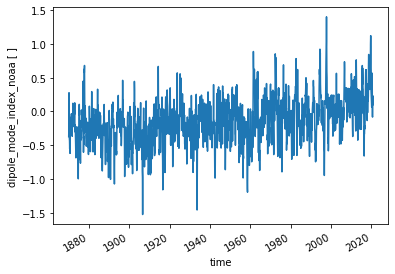

In [71]:
ds['dmi'].plot()

In [77]:
time_sel = slice('1981-01-02', '2010-12-31')
ds['dmi'].std()

<xarray.DataArray 'dmi' ()>
array(0.33708443)

In [74]:
ds['dmi'].sel(time = time_sel).std()

<xarray.DataArray 'dmi' ()>
array(0.31914069)